__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [2]:
#Comenzamos elborando el método de Runge Kutta de orden 4
function rungeKutta(f::Function,list,x0)
    x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        t2 = i*h+h/2
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t2)
        k3 = f(x+(h/2)*k2,t2)
        k4 = f(x+h*k3,t)
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

rungeKutta (generic function with 1 method)

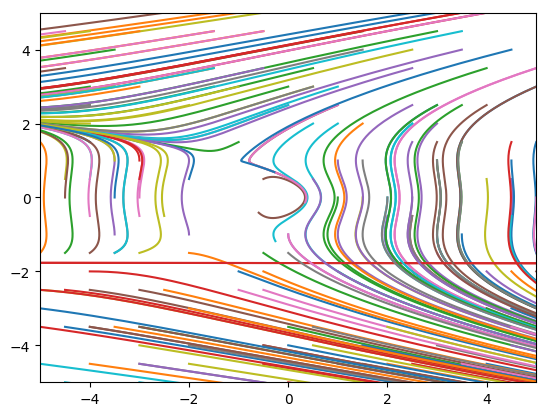

In [6]:
# ahora definimos la función de la matriz asosiada a el sistema
using PyPlot
f(x,t)= [x[2]-(x[2])^3,-x[1]-(x[2])^2]
list=-1:0.01:5
   
for i in 1:200
    w= 0.5*rand(-10:10,2,1)
    sol=rungeKutta(f,list,w)
    listx1_RK4 = map(x->x[1],sol)          
    listx2_RK4 = map(x->x[2],sol)
    
    xlim(-5,5)
    ylim(-5,5)  
    plot(listx1_RK4,listx2_RK4)
end

Calculamos el Jacobiano el cual esta dado por:
$$J=
\begin{bmatrix}
   \frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
   \frac{\partial v}{\partial x} & \frac{\partial v}{\partial y} \\
\end{bmatrix}$$


entonces primero encontramos los puntos criticos de

$u(x,y)=y-y^3\space y \space v(x,y)=-x-y^2$  
factorizando tenemos que $y(1-y^2)=0$$\space$ entonces $y=0,1,-1$  y para $v(x,y)$ los puntos son $0,1$
entonces el jacobiano queda como:
$$J=\begin{bmatrix}
    0 & 1-3y^2 \\
   -1 & -2y \\
\end{bmatrix}$$ 
 y en $(0,0)$ se vuelve:
$$J=\begin{bmatrix}
    0 & 1 \\
   -1 & 0 \\
\end{bmatrix}$$ 

por lo que  $$\Delta = -1$$ $\space$  y $\space$ $$\tau = 0$$



__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

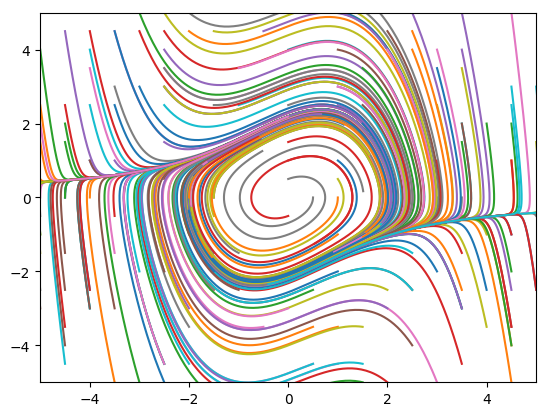

In [7]:
using PyPlot
e(x,t)= [x[2],-x[1]+0.5*(1-x[1]^2)*x[2]]
list=-1:0.01:5
   
for i in 1:200
    w= 0.5*rand(-10:10,2,1)
    sol=rungeKutta(e,list,w)
    listx1_RK4 = map(x->x[1],sol)          
    listx2_RK4 = map(x->x[2],sol)
    
    xlim(-5,5)
    ylim(-5,5)  
    plot(listx1_RK4,listx2_RK4)
end

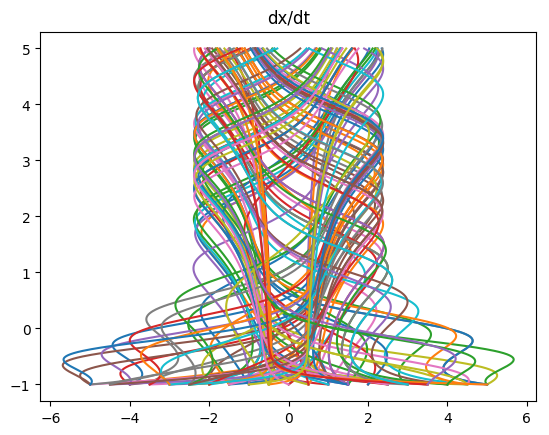

In [15]:
for i in 1:100
w= 0.5*rand(-10:10,2,1)
sol=rungeKutta(e,list,w)
listx2_RK4 = map(x->x[2],sol) 
 title("dx/dt")   
plot(listx2_RK4,list)
end